In [1]:
from numpy import arange, zeros, tanh
import matplotlib.pyplot as plt
import neuronioO
import neuronioI
import neuronioE

In [2]:
def dsdt(v, s, tau_s, tau_d):
    eq = (1+tanh(v/4))/2  * (1-s)/tau_s - s/tau_d
    return eq

In [3]:
plt.style.use('bmh')

In [4]:
tmax = 1000
dt = 0.001
N = round(tmax/dt)
t = arange(0, tmax, dt)

In [5]:
VI1, hI1, nI1, sI1 = zeros(N),zeros(N),zeros(N),zeros(N)
VI1[0] = -70
hI1[0] = neuronioI.alpha('h', VI1[0]) / (neuronioI.alpha('h',VI1[0])+neuronioI.beta('h',VI1[0]))
nI1[0] = neuronioI.alpha('n', VI1[0]) / (neuronioI.alpha('n',VI1[0])+neuronioI.beta('n',VI1[0]))

In [6]:
VI2, hI2, nI2, sI2 = zeros(N),zeros(N),zeros(N),zeros(N)
VI2[0] = -67.5
hI2[0] = neuronioI.alpha('h', VI2[0]) / (neuronioI.alpha('h',VI2[0])+neuronioI.beta('h',VI2[0]))
nI2[0] = neuronioI.alpha('n', VI2[0]) / (neuronioI.alpha('n',VI2[0])+neuronioI.beta('n',VI2[0]))

In [7]:
VI3, hI3, nI3, sI3 = zeros(N),zeros(N),zeros(N),zeros(N)
VI3[0] = -65
hI3[0] = neuronioI.alpha('h', VI3[0]) / (neuronioI.alpha('h',VI3[0])+neuronioI.beta('h',VI3[0]))
nI3[0] = neuronioI.alpha('n', VI3[0]) / (neuronioI.alpha('n',VI3[0])+neuronioI.beta('n',VI3[0]))

In [8]:
VI4, hI4, nI4, sI4 = zeros(N),zeros(N),zeros(N),zeros(N)
VI4[0] = -62.5
hI4[0] = neuronioI.alpha('h', VI4[0]) / (neuronioI.alpha('h',VI4[0])+neuronioI.beta('h',VI4[0]))
nI4[0] = neuronioI.alpha('n', VI4[0]) / (neuronioI.alpha('n',VI4[0])+neuronioI.beta('n',VI4[0]))

In [9]:
VI5, hI5, nI5, sI5 = zeros(N),zeros(N),zeros(N),zeros(N)
VI5[0] = -60
hI5[0] = neuronioI.alpha('h', VI5[0]) / (neuronioI.alpha('h',VI5[0])+neuronioI.beta('h',VI5[0]))
nI5[0] = neuronioI.alpha('n', VI5[0]) / (neuronioI.alpha('n',VI5[0])+neuronioI.beta('n',VI5[0]))

In [10]:
VO1, mO1, hO1, nO1, aO1, bO1, rO1, sO1= zeros(N),zeros(N),zeros(N),zeros(N),zeros(N),zeros(N),zeros(N),zeros(N)
VO1[0] = -75.61
mO1[0] = 0.0122
hO1[0] = 0.9152
nO1[0] = 0.07561
aO1[0] = 0.0229
bO1[0] = 0.2843
rO1[0] = 0.06123

In [11]:
VE, hE, nE, sE = zeros(N),zeros(N),zeros(N),zeros(N)
VE[0] = -60
hE[0] = neuronioE.alpha('h', VE[0]) / (neuronioE.alpha('h',VE[0])+neuronioE.beta('h',VE[0]))
nE[0] = neuronioE.alpha('n', VE[0]) / (neuronioE.alpha('n',VE[0])+neuronioE.beta('n',VE[0]))

In [12]:
gii = 0.02
goi = 0.04
gio = 0.12
gie = 0.1
goe = 0.15
gei = 0.05
geo = 0.01

. . . . . . . . . . 100000/1000000
. . . . . . . . . 200000/1000000
. . . . . . . . . 300000/1000000
. . . . . . . . . 400000/1000000
. . . . . . . . . 500000/1000000
. . . . . . . . . 600000/1000000
. . . . . . . . . 700000/1000000
. . . . . . . . . 800000/1000000
. . . . . . . . . 900000/1000000
. . . . . . . . . 

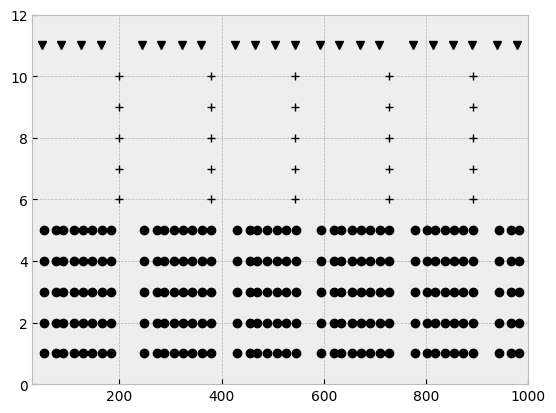

In [13]:
plt.figure()
plt.axis(ymin=0, ymax=12, xmin=30, xmax=1000)

for k in range(N-1):
    taus, taud = 0.3, 9
    # neuronio I-1
    jsin = 5*gii*sI1[k]*(-80-VI1[k]) + 5*goi*(-80-VI1[k])*sO1[k]+ gei*sE[k]*(-VI1[k])
    VI1[k+1] = VI1[k] + dt * neuronioI.dvdt(VI1[k], hI1[k], nI1[k], 0.8, jsin)
    hI1[k+1] = hI1[k] + dt * neuronioI.dhdt(VI1[k], hI1[k])
    nI1[k+1] = nI1[k] + dt * neuronioI.dndt(VI1[k], nI1[k])
    sI1[k+1] = sI1[k] + dt * dsdt(VI1[k], sI1[k], taus, taud)
    if VI1[k+1] >= 0 > VI1[k]:
        plt.plot(t[k], 1, 'ko')
        plt.plot(t[k], 2, 'ko')
        plt.plot(t[k], 3, 'ko')
        plt.plot(t[k], 4, 'ko')
        plt.plot(t[k], 5, 'ko')

     # neuronios 0
    taus, taud = 0.2, 20
    jsin = 5*gio*sI1[k]*(-80-VO1[k]) + geo*sE[k]*(-VO1[k])
    VO1[k+1] = VO1[k] + dt * neuronioO.dvdt(VO1[k],mO1[k],hO1[k],nO1[k],aO1[k],bO1[k],rO1[k], -3, jsin)
    mO1[k+1] = mO1[k] + dt * neuronioO.dmdt(VO1[k],mO1[k])
    hO1[k+1] = hO1[k] + dt * neuronioO.dhdt(VO1[k],hO1[k])
    nO1[k+1] = nO1[k] + dt * neuronioO.dndt(VO1[k],nO1[k])
    aO1[k+1] = aO1[k] + dt * neuronioO.dadt(VO1[k],aO1[k])
    bO1[k+1] = bO1[k] + dt * neuronioO.dbdt(VO1[k],bO1[k])
    rO1[k+1] = rO1[k] + dt * neuronioO.drdt(VO1[k],rO1[k])
    sO1[k+1] = sO1[k] + dt * dsdt(VO1[k],sO1[k], taus, taud)
    if VO1[k+1] >= 0 > VO1[k]:
        plt.plot(t[k], 6, 'k+')
        plt.plot(t[k], 7, 'k+')
        plt.plot(t[k], 8, 'k+')
        plt.plot(t[k], 9, 'k+')
        plt.plot(t[k], 10, 'k+')

    # neurônio E
    taus, taud = 0.1, 3
    jsin = gie * sI1[k] * (-80-VE[k]) + goe*(-80-VE[k])*sO1[k]
    VE[k+1] = VE[k] + dt * neuronioE.dvdt(VE[k], hE[k], nE[k], 0.8, jsin)
    hE[k+1] = hE[k] + dt * neuronioE.dhdt(VE[k], hE[k])
    nE[k+1] = nE[k] + dt * neuronioE.dndt(VE[k], nE[k])
    sE[k+1] = sE[k] + dt * dsdt(VE[k], sE[k], taus, taud)

    if VE[k+1] >= 0 > VE[k]:
        plt.plot(t[k], 11, 'kv')

    if k%100000 == 0 and k!=0:
        print(f'{k}/{N}')
    elif k%10000 == 0:
        print(f'.', end=' ')

plt.show()